# Article Clustering

Will be drawing in part from _Content-driven, unsupervised clustering of news articles through multiscale graph partitioning_

### Load the things

In [16]:
import pandas as pd

def load_data():
    article_table = pd.read_csv("../data/raw/kaggle1/articles1.csv")
    return article_table

In [17]:
articles = load_data()

In [1]:
import json

with open("../data/cache/as_vectors/doc_as_vectors.json", 'r') as in_file:
    as_vectors = json.load(in_file)

In [2]:
as_vectors

[[0.5,
  0.375,
  -0.625,
  -0.5,
  0.0,
  0.25,
  -0.5,
  0.0,
  0.0,
  0.0,
  -0.625,
  0.0,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  0.125,
  0.75,
  0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.75,
  0.0,
  -0.625,
  0.0,
  0.0,
  -0.75,
  0.0,
  -0.625,
  0.0,
  -0.625,
  0.0,
  -0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  -0.25,
  0.0,
  0.0,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  1.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.375,
  -0.25,
  -0.25,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.125,
  0.0,
  0.0,
  -0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

"We start by obtaining the pairwise cosine similarity for all pairs of articles. These distances form a similarity matrix, which can be thought of as a weighted adjacency matrix of a complete graph."

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

as_matrix = np.asarray(as_vectors)
sim_mat = cosine_similarity(as_matrix)
sim_mat = np.abs(sim_mat)
sim_mat.shape

(500, 500)

In [36]:
sim_mat[0].argsort()

array([217, 183, 186, 192, 193, 199, 202, 205, 181, 436, 465, 232, 233,
       235, 236, 239, 256, 223, 258, 176, 169,  83, 476,  95,  97,  99,
       108, 111, 173, 121, 131, 473, 141, 145, 159, 165, 167, 128,  82,
       259, 264, 369, 373, 445, 444, 385, 386, 400, 357, 440, 411, 438,
       423, 425, 427, 430, 431, 439, 261, 355, 337, 269, 291, 457, 297,
       456, 300, 304, 354, 308, 315, 317, 320, 326, 330, 334, 335, 312,
        80, 435, 493,  34,  68,  65,  35,   9,  38, 481,  66,  52,   5,
        30,  70,  28,  69,  49,  53,  76,  67, 352, 365,   2, 272, 162,
       129, 276, 140, 497, 102, 295, 211, 420, 166, 460, 306, 462, 125,
       262,  11, 377, 171, 154, 124, 185, 417, 110, 238,  31, 194, 177,
         8, 347, 455, 416, 178, 303,  16, 466, 482,  74, 155, 179, 143,
       153, 441, 426, 289,  98, 152, 163, 394,  12,   6, 126,  61, 428,
       267,  47, 443,  14, 135, 134, 362,  64,  15,  87, 112, 341, 227,
       318, 216, 450, 285, 332,  77, 137, 407, 187, 294, 410,  4

In [39]:
print(articles.iloc[0])
print(articles.iloc[0].content)
print()
print(articles.iloc[57].content)

Unnamed: 0                                                     0
id                                                         17283
title          House Republicans Fret About Winning Their Hea...
publication                                       New York Times
author                                                Carl Hulse
date                                                  2016-12-31
year                                                        2016
month                                                         12
url                                                          NaN
content        WASHINGTON  —   Congressional Republicans have...
Name: 0, dtype: object
WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions o

## NOTE: should we take abs of sim_matrix?

(plotting the similarity matrix, out of curiosity)

/usr/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


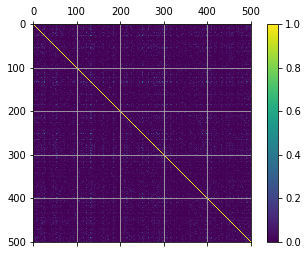

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
cax = ax.matshow(sim_mat, interpolation='nearest')
ax.grid(True)
fig.colorbar(cax)
fig.show()

### Similarity graph

Note that in the paper they use a fancier version called Knn-MST (minimum spanning tree) that's much better, before they run markov stability.

I will be using just knn first, and then later on try substituting the better version

We have to make an adjacency matrix

In [5]:
k = 13

adjacency_matrix = np.zeros(sim_mat.shape)

neighbor_indices = np.argsort(-sim_mat) # - makes it sort in descending
for i in range(0, sim_mat.shape[0]):
    for j in range(0, k):
        index = neighbor_indices[i][j]
        if sim_mat[i][index] > 0.0:
            adjacency_matrix[i][index] = 1

adjacency_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [6]:
import networkx as nx
#G = nx.from_numpy_matrix(adjacency_matrix)
G = nx.from_numpy_matrix(sim_mat)

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


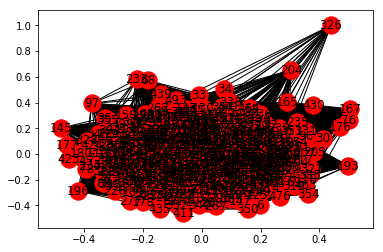

In [7]:
nx.draw_networkx(G)
plt.show()